In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from diffeqfns import *

In [4]:
#show that error is order of delta t for eulers method with a simple diffeq

In [5]:
def simple(t, y):
    return y

In [6]:
estimates=eulers_arr(simple, 0, 12, 0.25, 5)

In [7]:
def simple_actual(t,y0):
    return y0*np.exp(t)

In [8]:
actuals=simple_actual(estimates[0],12)

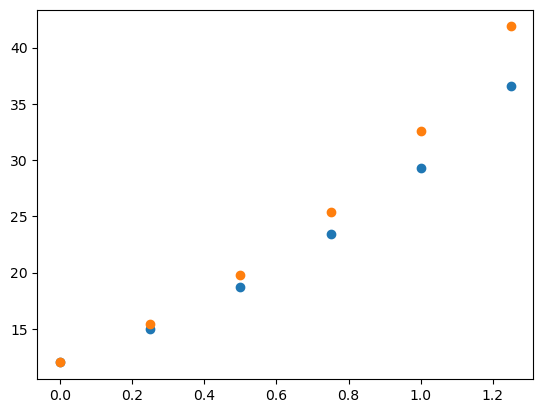

In [9]:
plt.scatter(estimates[0],estimates[1:])
plt.scatter(estimates[0],actuals)

In [10]:
rmse(estimates[1:],actuals)

array([2.70317091])

In [11]:
errorvsdeltat(eulers_arr, rmse, simple, simple_actual, 0, 12, 5, 20)

[[6.03984820e+02 5.17862694e+01 1.08126836e+01 3.49694228e+00
  1.40783701e+00 6.31983798e-01 2.99465008e-01 1.45771801e-01
  7.19164437e-02 3.57184074e-02 1.77995663e-02 8.88491318e-03
  4.43874401e-03 2.21844447e-03 1.10899042e-03 5.54437270e-04
  2.77204152e-04 1.38598500e-04 6.92985194e-05 3.46492213e-05]]


array([[11.66303013,  4.78940022,  3.09203949,  2.48391131,  2.22764731,
         2.11037611,  2.05434114,  2.02696064,  2.01342806,  2.00670099,
         2.00334724,  2.00167281,  2.0008362 ,  2.00041806,  2.00020901,
         2.00010449,  2.0000516 ,  2.00002108,  2.00000222]])

In [12]:
errorvsdeltat(eulers_arr, maxerror, simple, simple_actual, 0, 12, 5, 20)

[[1.39695791e+03 1.10129855e+02 2.10520870e+01 6.35649473e+00
  2.44930316e+00 1.07245333e+00 5.01469649e-01 2.42431099e-01
  1.19186263e-01 5.90915463e-02 2.94210881e-02 1.46794613e-02
  7.33197103e-03 3.66404699e-03 1.83153903e-03 9.15648416e-04
  4.57793940e-04 2.28889519e-04 1.14443246e-04 5.72223216e-05]]


array([[12.68464313,  5.23130345,  3.3119019 ,  2.59522579,  2.28383193,
         2.13862062,  2.0685038 ,  2.03405235,  2.01697655,  2.0084759 ,
         2.00423486,  2.00211666,  2.00105813,  2.00052902,  2.00026451,
         2.00013223,  2.0000651 ,  2.00002645,  1.99997559]])

In [13]:
#show that error is order of delta t for eulers method with a simple 1D kinematics situation

In [14]:
def kinematics_diffeq(t, ys):
    yps=np.zeros(ys.shape[0]) #stands for y primes
    yps[0], yps[1]=ys[1], -9.8 #have to do in one row since they can depend on each other
    return yps

In [15]:
estimates=eulers_arr(kinematics_diffeq, 0, np.array([100,5]), 1, 10)

In [16]:
def kinematics(ts, y0s):
    yactual=y0s[0]+y0s[1]*ts+(-9.8/2)*(ts**2)
    vactual=y0s[1]+(-9.8)*ts
    return np.array([yactual,vactual])

In [17]:
actuals=kinematics(estimates[0],np.array([100,5]))

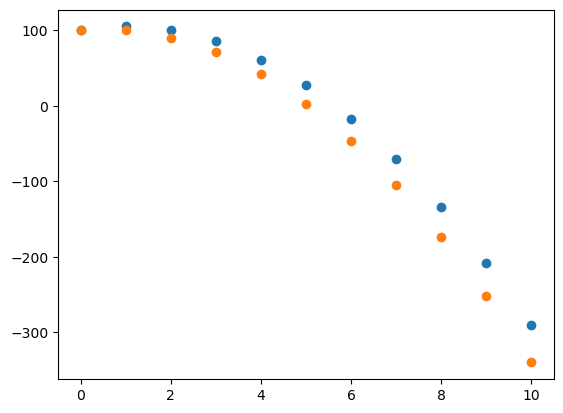

In [18]:
#position vs time
plt.scatter(estimates[0],estimates[1])
plt.scatter(estimates[0],actuals[0])

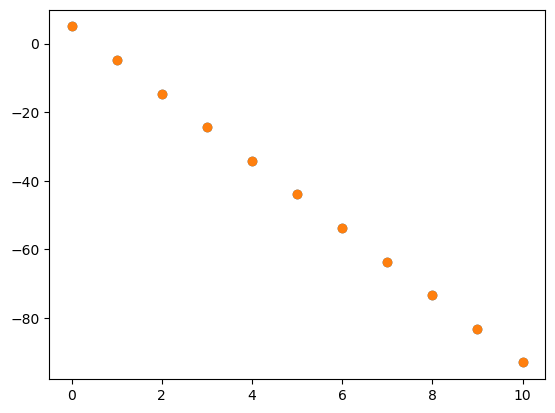

In [19]:
#velocity vs time
plt.scatter(estimates[0],estimates[2])
plt.scatter(estimates[0],actuals[1])

In [20]:
rmse(estimates[1:],actuals)

array([2.89887909e+01, 8.83320525e-15])

In [21]:
errorvsdeltat(eulers_arr, rmse, kinematics_diffeq, kinematics, 0, np.array([100,5]), 100, 10)

[[2.83608004e+02 1.41804002e+02 7.09020010e+01 3.54510005e+01
  1.77255003e+01 8.86275013e+00 4.43137506e+00 2.21568753e+00
  1.10784377e+00 5.53921883e-01]
 [6.63783023e-13 6.58437323e-13 6.58435520e-13 6.02067784e-13
  4.91471030e-13 3.50212838e-13 2.75530351e-13 3.12037646e-13
  2.45678683e-12 6.98083050e-12]]


array([[2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        ],
       [1.00811877, 1.00000274, 1.09362357, 1.22503209, 1.40334955,
        1.27104995, 0.88300356, 0.12701047, 0.35193332]])

In [22]:
#show that error is order of delta t for eulers method with orbital mechanics

In [23]:
#use units astronomical units, years, and solar masses
a=1.000001 #semi major axis
e=0.0167 #eccentricty
GM=4*(math.pi)**2
x0=0
y0=a*(1-e)
vx0=-((GM/a)*((1+e)/(1-e)))**0.5
vy0=0
y0s=np.array([x0,y0,vx0,vy0])

In [24]:
# def orbital_diffeq(t, ys):
#     yps=np.zeros(ys.shape[0])
#     yps[0], yps[1], yps[2], yps[3]={ #x', y', vx', vy'
#         ys[2], #x'=vx
#         ys[3], #y'=vy
#         y

In [25]:
#show that error is order of delta t to the 4th for RK4 method using a simple diff eq
#note: doing e^x was causing issues because it grows way too fast past x=1 so the error gets huge also

In [26]:
def simple2(t, y):
    return 4*t**3-9*t**2-18*t+23

In [27]:
def simple2_actual(t, y0):
    return t**4-3*t**3-9*t**2+23*t-12

In [28]:
estimates=eulers_arr(simple2, 0, -12, 1, 10)
actuals=simple2_actual(estimates[0],-12)

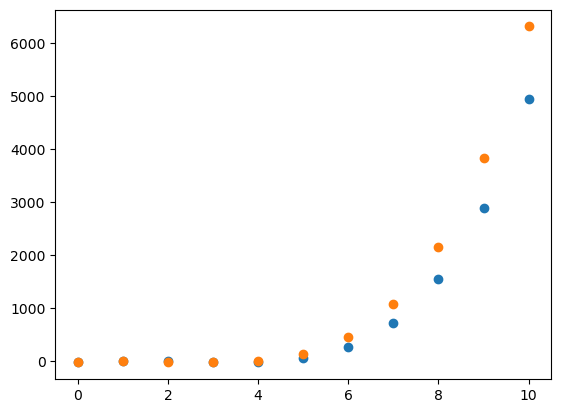

In [29]:
plt.scatter(estimates[0],estimates[1:])
plt.scatter(estimates[0],actuals)

In [30]:
errorvsdeltat(eulers_arr, rmse, simple2, simple2_actual, 0, -12, 50, 20)

[[9.04964499e+04 1.06008374e+04 1.12655170e+03 8.32384922e+01
  1.47770642e+01 1.02722266e+01 4.94465498e+00 2.29796116e+00
  1.08962399e+00 5.28028871e-01 2.59578481e-01 1.28650457e-01
  6.40368240e-02 3.19458485e-02 1.59547256e-02 7.97280591e-03
  3.98526263e-03 1.99234649e-03 9.96102436e-04 4.98031658e-04]]


array([[ 8.53672653,  9.40998745, 13.53402344,  5.63295192,  1.43854538,
         2.07744052,  2.15175743,  2.10894875,  2.06356897,  2.03417814,
         2.01770353,  2.00900745,  2.00454291,  2.00228128,  2.00114311,
         2.00057227,  2.00028592,  2.00014218,  2.00007855]])

In [78]:
estimates=RK4(simple2, 0, -12, 3, 30, 10)
actuals=simple2_actual(estimates[0],-12)

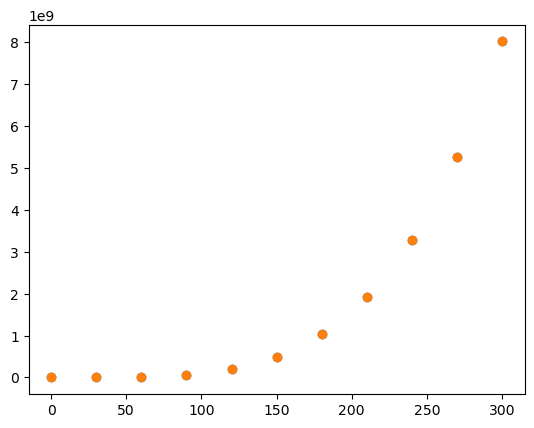

In [80]:
plt.scatter(estimates[0],estimates[1:])
plt.scatter(estimates[0],actuals)

In [82]:
errorvsdeltat(RK4, rmse, simple2, simple2_actual, 0, -12, dti=100)

[[nan nan nan nan nan nan nan nan nan nan]]


array([[nan, nan, nan, nan, nan, nan, nan, nan, nan]])